In [23]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [24]:
import warnings
warnings.filterwarnings('ignore')

In [25]:
train_data=pd.read_csv("Data/train.csv")
valid_data=pd.read_csv("Data/housing-test-set.csv")

In [26]:
train_data

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,9800,4,2,2,yes,yes,no,no,no,2,no,semi-furnished,5250000
1,6540,4,2,2,yes,yes,yes,no,yes,2,yes,furnished,8540000
2,3520,2,1,2,yes,no,no,no,no,0,yes,furnished,4515000
3,8250,3,1,1,yes,no,no,no,no,0,no,furnished,4480000
4,3180,4,1,2,yes,no,yes,no,yes,0,no,unfurnished,3290000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,3600,2,1,1,yes,no,no,no,no,0,no,furnished,3675000
377,4320,3,1,2,yes,no,no,no,no,2,yes,furnished,4060000
378,1836,2,1,1,no,no,yes,no,no,0,no,semi-furnished,2275000
379,15600,3,1,1,yes,no,no,no,yes,2,no,semi-furnished,5943000


In [27]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   area              381 non-null    int64 
 1   bedrooms          381 non-null    int64 
 2   bathrooms         381 non-null    int64 
 3   stories           381 non-null    int64 
 4   mainroad          381 non-null    object
 5   guestroom         381 non-null    object
 6   basement          381 non-null    object
 7   hotwaterheating   381 non-null    object
 8   airconditioning   381 non-null    object
 9   parking           381 non-null    int64 
 10  prefarea          381 non-null    object
 11  furnishingstatus  381 non-null    object
 12  price             381 non-null    int64 
dtypes: int64(6), object(7)
memory usage: 38.8+ KB


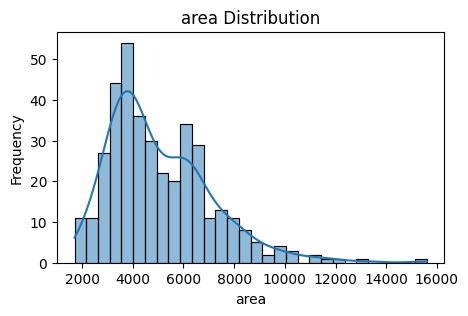

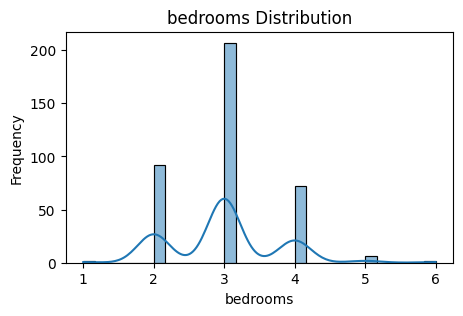

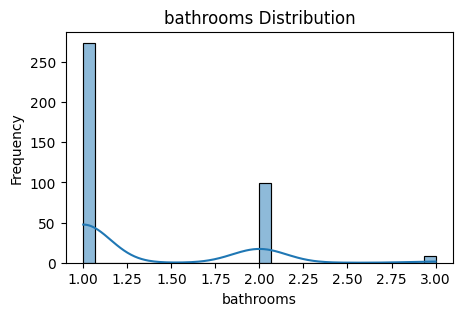

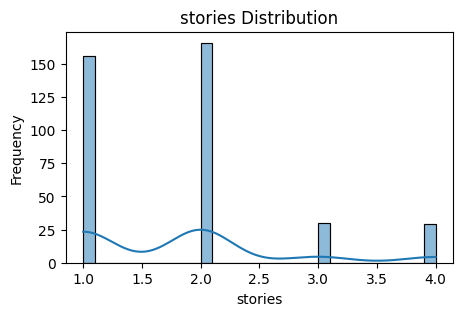

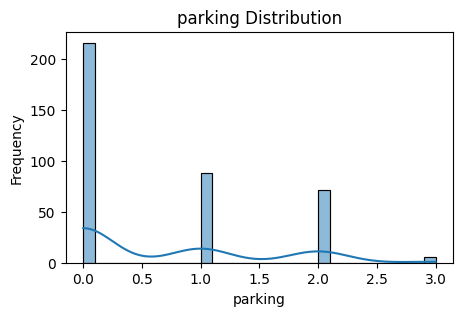

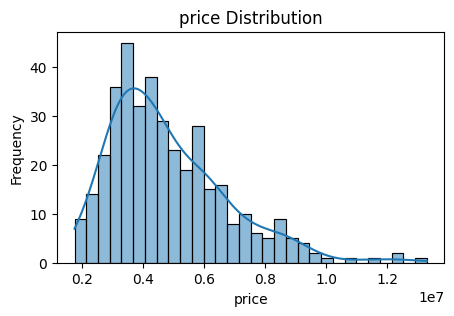

In [28]:
features = ['area','bedrooms','bathrooms','stories','parking','price']
for feature in features:
    plt.figure(figsize=(5,3))
    sns.histplot(data=train_data[feature], bins= 30, kde = True)
    plt.title(f'{feature} Distribution')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

for train data skewness

In [29]:
for feature in features:
    print(f"Skewness of {feature} is {train_data[feature].skew()}")


Skewness of area is 1.2164022522495177
Skewness of bedrooms is 0.47672803136305947
Skewness of bathrooms is 1.3550092170859072
Skewness of stories is 1.045806244065067
Skewness of parking is 0.8937880889625067
Skewness of price is 1.157101105608128


In [30]:
for feature in features:
        train_data[feature]=np.log1p(train_data[feature])
        # train_data['price']=np.log1p(train_data['price'])
        print(f"Skewness of {feature} is {train_data[feature].skew()}")
        # plt.scatter(train_data[feature],train_data['price'])
        # plt.xlabel(feature)
        # plt.ylabel('price')
        # plt.title(feature)
        # plt.show()

Skewness of area is 0.10059638864931163
Skewness of bedrooms is -0.16446126494591812
Skewness of bathrooms is 1.1681974326156501
Skewness of stories is 0.4980218748350377
Skewness of parking is 0.5660765666579018
Skewness of price is 0.12592697398085254


for validation data skewness


In [31]:
for feature in features:
    print(f"Skewness of {feature} is {valid_data[feature].skew()}")

Skewness of area is 1.13523091090929
Skewness of bedrooms is 0.5139321859830771
Skewness of bathrooms is 2.21829915808024
Skewness of stories is 1.224638771065779
Skewness of parking is 0.46389831129437054
Skewness of price is 1.6673982023428335


In [32]:
for feature in features:
        valid_data[feature]=np.log1p(valid_data[feature])
        # valid_data['price']=np.log1p(valid_data['price'])
        print(f"Skewness of {feature} is {valid_data[feature].skew()}")
        # plt.scatter(valid_data[feature],valid_data['price'])
        # plt.xlabel(feature)
        # plt.ylabel('price')
        # plt.title(feature)
        # plt.show()

Skewness of area is -0.028508137872490003
Skewness of bedrooms is 0.023390738482456805
Skewness of bathrooms is 1.6213754580663182
Skewness of stories is 0.6728180140027237
Skewness of parking is 0.15259085045586882
Skewness of price is 0.282466275427827


One Hot Encoding for furnishingstatus

In [33]:
train_data=train_data.join(pd.get_dummies(train_data.furnishingstatus)).drop("furnishingstatus",axis=1)
valid_data=valid_data.join(pd.get_dummies(valid_data.furnishingstatus)).drop("furnishingstatus",axis=1)



In [34]:
train_data

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price,furnished,semi-furnished,unfurnished
0,9.190240,1.609438,1.098612,1.098612,yes,yes,no,no,no,1.098612,no,15.473739,False,True,False
1,8.785845,1.609438,1.098612,1.098612,yes,yes,yes,no,yes,1.098612,yes,15.960272,True,False,False
2,8.166500,1.098612,0.693147,1.098612,yes,no,no,no,no,0.000000,yes,15.322916,True,False,False
3,9.018090,1.386294,0.693147,0.693147,yes,no,no,no,no,0.000000,no,15.315134,True,False,False
4,8.064951,1.609438,0.693147,1.098612,yes,no,yes,no,yes,0.000000,no,15.006398,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,8.188967,1.098612,0.693147,0.693147,yes,no,no,no,no,0.000000,no,15.117064,True,False,False
377,8.371242,1.386294,0.693147,1.098612,yes,no,no,no,no,1.098612,yes,15.216694,True,False,False
378,7.515889,1.098612,0.693147,0.693147,no,no,yes,no,no,0.000000,no,14.637491,False,True,False
379,9.655090,1.386294,0.693147,0.693147,yes,no,no,no,yes,1.098612,no,15.597725,False,True,False


In [35]:
categorical_features = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnished','semi-furnished','unfurnished']
for feature in categorical_features:
    train_data[feature] = train_data[feature].replace({'yes': 1, 'no': 0})
    train_data[feature] = train_data[feature].replace({True: 1,False: 0})

train_data


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price,furnished,semi-furnished,unfurnished
0,9.190240,1.609438,1.098612,1.098612,1,1,0,0,0,1.098612,0,15.473739,0,1,0
1,8.785845,1.609438,1.098612,1.098612,1,1,1,0,1,1.098612,1,15.960272,1,0,0
2,8.166500,1.098612,0.693147,1.098612,1,0,0,0,0,0.000000,1,15.322916,1,0,0
3,9.018090,1.386294,0.693147,0.693147,1,0,0,0,0,0.000000,0,15.315134,1,0,0
4,8.064951,1.609438,0.693147,1.098612,1,0,1,0,1,0.000000,0,15.006398,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,8.188967,1.098612,0.693147,0.693147,1,0,0,0,0,0.000000,0,15.117064,1,0,0
377,8.371242,1.386294,0.693147,1.098612,1,0,0,0,0,1.098612,1,15.216694,1,0,0
378,7.515889,1.098612,0.693147,0.693147,0,0,1,0,0,0.000000,0,14.637491,0,1,0
379,9.655090,1.386294,0.693147,0.693147,1,0,0,0,1,1.098612,0,15.597725,0,1,0


for validation data

In [36]:
valid_data

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price,furnished,semi-furnished,unfurnished
0,8.794976,1.386294,1.098612,0.693147,yes,no,yes,no,yes,0.000000,yes,15.644887,False,False,True
1,8.284252,1.386294,0.693147,1.098612,yes,no,no,no,no,0.000000,no,15.199302,True,False,False
2,9.100637,1.609438,1.609438,1.609438,yes,no,no,no,yes,1.386294,no,16.321037,True,False,False
3,8.197263,1.098612,0.693147,0.693147,yes,no,no,no,no,0.000000,no,14.869823,False,False,True
4,7.990915,1.386294,0.693147,1.098612,yes,no,yes,no,yes,0.000000,no,15.250595,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,8.055475,1.098612,1.098612,0.693147,no,no,yes,no,no,0.000000,no,15.154451,False,True,False
78,8.682877,1.609438,1.098612,1.098612,no,no,yes,no,no,0.693147,no,15.216694,False,False,True
79,7.783641,1.386294,0.693147,1.098612,yes,no,no,no,no,0.000000,no,14.557448,False,False,True
80,8.440960,1.609438,0.693147,1.098612,yes,no,no,no,yes,0.000000,no,15.233788,False,True,False


In [37]:
categorical_features = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnished','semi-furnished','unfurnished']
for feature in categorical_features:
    valid_data[feature] = valid_data[feature].replace({'yes': 1, 'no': 0})
    valid_data[feature] = valid_data[feature].replace({True: 1,False: 0})

valid_data

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price,furnished,semi-furnished,unfurnished
0,8.794976,1.386294,1.098612,0.693147,1,0,1,0,1,0.000000,1,15.644887,0,0,1
1,8.284252,1.386294,0.693147,1.098612,1,0,0,0,0,0.000000,0,15.199302,1,0,0
2,9.100637,1.609438,1.609438,1.609438,1,0,0,0,1,1.386294,0,16.321037,1,0,0
3,8.197263,1.098612,0.693147,0.693147,1,0,0,0,0,0.000000,0,14.869823,0,0,1
4,7.990915,1.386294,0.693147,1.098612,1,0,1,0,1,0.000000,0,15.250595,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,8.055475,1.098612,1.098612,0.693147,0,0,1,0,0,0.000000,0,15.154451,0,1,0
78,8.682877,1.609438,1.098612,1.098612,0,0,1,0,0,0.693147,0,15.216694,0,0,1
79,7.783641,1.386294,0.693147,1.098612,1,0,0,0,0,0.000000,0,14.557448,0,0,1
80,8.440960,1.609438,0.693147,1.098612,1,0,0,0,1,0.000000,0,15.233788,0,1,0


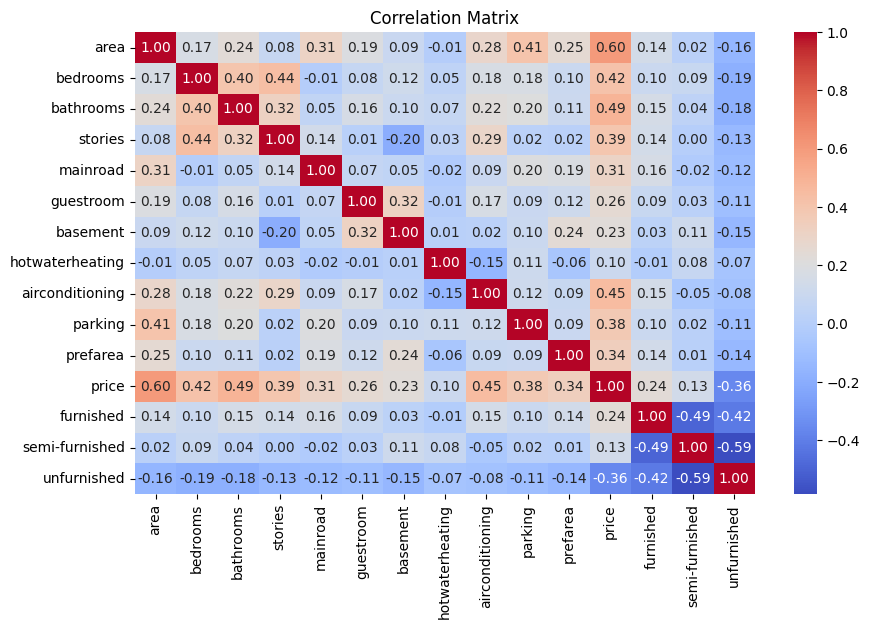

In [38]:
plt.figure(figsize=(10, 6))
correlation_matrix = train_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Linear Regression Model 

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error 
from evaluation import evaluate_predictions
from sklearn.preprocessing import StandardScaler



In [40]:
# Model training
y_train = train_data["price"]
x_train = train_data.drop("price", axis=1)
y_valid = valid_data["price"]
x_valid = valid_data.drop("price", axis=1)

# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform the training data
x_train_scaled = scaler.fit_transform(x_train)

# Transform the validation data using the same scaler
x_valid_scaled = scaler.transform(x_valid)

# Initialize Linear Regression model
model = LinearRegression()

# Train the model
model.fit(x_train_scaled, y_train)

# Make predictions on the train data
y_train_pred = model.predict(x_train_scaled)

# Make predictions on the validation data
y_valid_pred = model.predict(x_valid_scaled)

# Evaluate predictions on training data
train_metrics = evaluate_predictions(y_train, y_train_pred)
print("Training Metrics:")
for metric, value in train_metrics.items():
    print(f"{metric}: {value:.4f}")

# Evaluate predictions on validation data
valid_metrics = evaluate_predictions(y_valid, y_valid_pred)
print("\nValidation Metrics:")
for metric, value in valid_metrics.items():
    print(f"{metric}: {value:.4f}")

Training Metrics:
MAE: 0.1632
MSE: 0.0443
RMSE: 0.2104
R2: 0.6997

Validation Metrics:
MAE: 0.1427
MSE: 0.0317
RMSE: 0.1780
R2: 0.7331


In [41]:
# model_training.py

import joblib
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Assume train_data and valid_data are already defined
y_train = train_data["price"]
x_train = train_data.drop("price", axis=1)
y_valid = valid_data["price"]
x_valid = valid_data.drop("price", axis=1)

# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform the training data
x_train_scaled = scaler.fit_transform(x_train)

# Transform the validation data using the same scaler
x_valid_scaled = scaler.transform(x_valid)
joblib.dump(x_valid_scaled, 'x_valid_scaled.pkl')
# Initialize Linear Regression model
model = LinearRegression()

# Train the model
model.fit(x_train_scaled, y_train)

# Make predictions on both training and validation data
y_train_pred = model.predict(x_train_scaled)
y_valid_pred = model.predict(x_valid_scaled)

# Save the model, scaler, and predictions to pickle files
joblib.dump(model, 'housing_price_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump({
    'y_valid_pred': y_valid_pred,
    'y_valid_actual': y_valid,
    'y_train_pred': y_train_pred,
    'y_train_actual': y_train

}, 'predictions_data.pkl')

print("Model and data saved successfully.")


Model and data saved successfully.
